f'(x) = 1 - 3*sin(3*x - 1)
f''(x) = -9*cos(3*x - 1)
f'''(x) = 27*sin(3*x - 1)
f(0) = 0.540
T(x) = -3.78661943163553*x**3 - 2.43136037640663*x**2 + 3.52441295442369*x + 0.54030230586814


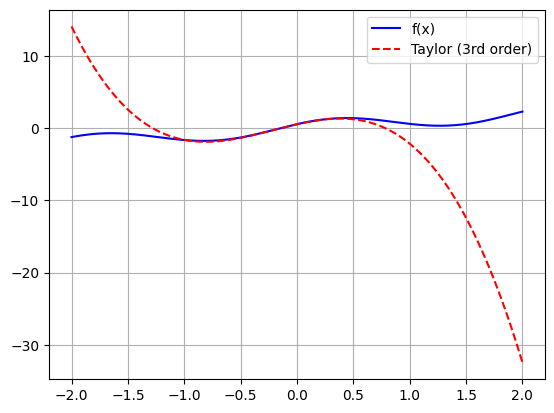

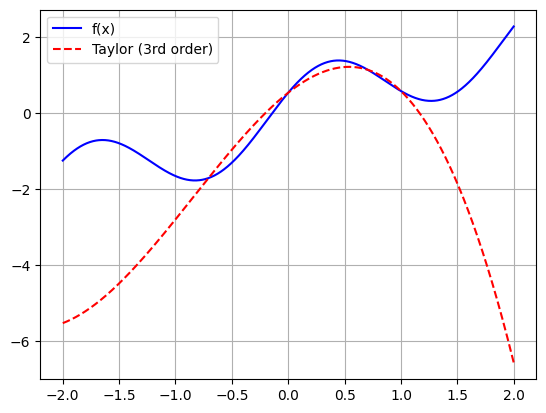

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

# Задаємо символьну змінну x та функцію f(x)
x = sp.symbols('x')
f = sp.cos(3*x - 1) + x

# Знаходимо перші три похідні
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)

# Виводимо похідні
print("f'(x) =", f1)
print("f''(x) =", f2)
print("f'''(x) =", f3)

# Знаходимо значення функції та похідних у точці x = 0
x0 = 0
f_x0 = f.subs(x, x0).evalf()
f1_x0 = f1.subs(x, x0).evalf()
f2_x0 = f2.subs(x, x0).evalf()
f3_x0 = f3.subs(x, x0).evalf()

# Поліном Тейлора 3-го порядку
T = f_x0 + f1_x0*(x-x0) + (f2_x0/2)*(x-x0)**2 + (f3_x0/6)*(x-x0)**3
print("f(0) =", f_x0.round(3))
print("T(x) =", T.evalf())

# Побудова графіків
x_vals = np.linspace(-2, 2, 1000)
f_vals = np.array([f.subs(x, xi).evalf() for xi in x_vals])
T_vals = np.array([T.subs(x, xi).evalf() for xi in x_vals])

plt.plot(x_vals, f_vals, label='f(x)', color='blue')
plt.plot(x_vals, T_vals, label='Taylor (3rd order)', color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

# Використання approximate_taylor_polynomial
def f_numeric(x):
    return np.cos(3*x - 1) + x

taylor = approximate_taylor_polynomial(f_numeric, 0, degree=3, scale=1)
plt.plot(x_vals, f_numeric(x_vals), label="f(x)", color='blue')
plt.plot(x_vals, taylor(x_vals), label="Taylor (3rd order)", color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()
